In [21]:
import pandas as pd
import numpy as np
import datetime
from functools import reduce
import matplotlib.pyplot as plt
from scipy.stats import linregress

covid_all2 = pd.read_csv("Final Merge 7_17_20.csv")
covid_rep = covid_all2[covid_all2.Political_Party == "Republican"]
covid_dem = covid_all2[covid_all2.Political_Party == "Democratic"]
covid_all2

,Unnamed: 0,Unnamed: 0.1,County,NewPos_All,Age 0-19_cases,Age 20-39_cases,Age 40-59_cases,Age 60-79_cases,Age 80+_cases,Positive UnkAge_cases,...,Political_Party,Percent Below Poverty Level,Household Income Median,Household Income Mean,Population,Pop_per100k,Case_per100k,Deaths_per100k,Hoptializations_per100k,Population_Density
0,0,0,Adams County,166.0,17.0,63.0,59.0,25.0,0.0,2.0,...,Republican,25.2,49142.0,61370.0,19983.0,0.19983,830.706100,0.000000,45.038283,9.8
1,1,1,Asotin County,21.0,1.0,1.0,10.0,7.0,2.0,0.0,...,Republican,13.0,50423.0,65079.0,22582.0,0.22582,92.994420,8.856611,4.428306,34.3
2,2,2,Benton County,1956.0,185.0,747.0,572.0,285.0,166.0,1.0,...,Republican,12.8,65650.0,83941.0,204390.0,2.04390,956.993982,41.587162,114.976271,103.4
3,3,3,Chelan County,403.0,47.0,175.0,127.0,42.0,12.0,0.0,...,Republican,11.6,56135.0,75117.0,77200.0,0.77200,522.020725,7.772021,23.316062,24.6
4,4,4,Clallam County,43.0,6.0,15.0,10.0,10.0,2.0,0.0,...,Democratic,15.9,49913.0,65858.0,77331.0,0.77331,55.605126,0.000000,3.879427,27.0
5,5,5,Clark County,922.0,94.0,335.0,304.0,145.0,44.0,0.0,...,Democratic,9.3,71636.0,91321.0,488241.0,4.88241,188.841167,6.144507,22.734674,667.9
6,6,6,Columbia County,8.0,4.0,1.0,2.0,1.0,0.0,0.0,...,Republican,11.6,51111.0,70516.0,3985.0,0.03985,200.752823,0.000000,0.000000,4.6
7,7,7,Cowlitz County,208.0,24.0,83.0,57.0,40.0,4.0,0.0,...,Republican,16.0,51752.0,67765.0,110593.0,1.10593,188.077003,0.000000,18.084327,87.5
8,8,8,Douglas County,279.0,40.0,120.0,88.0,22.0,8.0,1.0,...,Republican,13.3,60452.0,77297.0,43429.0,0.43429,642.427871,6.907827,29.933915,21.2
9,9,9,Franklin County,1898.0,200.0,727.0,700.0,229.0,39.0,3.0,...,Republican,15.7,62002.0,76571.0,95222.0,0.95222,1993.236857,34.655857,170.128752,66.8


The lower quartile of Cases per 100k pop is: 79.74129378971216
The upper quartile of Cases per 100k pop is: 367.37362917163966
The interquartile range of Cases per 100k pop is: 287.63233538192753
The the median of Cases per 100k pop is: 188.84116655504147 
Values below -351.70720928317917 could be outliers.
Values above 798.822132244531 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x2078bd780c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2078bd78e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2078bd786c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2078bd7b6c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2078bda7a48>],
 'means': []}

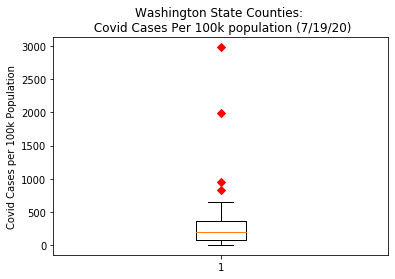

In [22]:
covid_boxa = covid_all2['Case_per100k']
covid_boxd = covid_dem['Case_per100k']
covid_boxr = covid_rep['Case_per100k']

cov_quartiles = covid_boxa.quantile([.25,.5,.75])
cov_lowerq = cov_quartiles[0.25]
cov_upperq = cov_quartiles[0.75]
cov_iqr = cov_upperq-cov_lowerq

print(f"The lower quartile of Cases per 100k pop is: {cov_lowerq}")
print(f"The upper quartile of Cases per 100k pop is: {cov_upperq}")
print(f"The interquartile range of Cases per 100k pop is: {cov_iqr}")
print(f"The the median of Cases per 100k pop is: {cov_quartiles[0.5]} ")

cov_lower_bound = cov_lowerq - (1.5*cov_iqr)
cov_upper_bound = cov_upperq + (1.5*cov_iqr)
print(f"Values below {cov_lower_bound} could be outliers.")
print(f"Values above {cov_upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Washington State Counties: \n Covid Cases Per 100k population (7/19/20)')
ax1.set_ylabel('Covid Cases per 100k Population')

ax1.boxplot(covid_boxa, 0, 'rD')

In [23]:
covid_boxa.sort_values(ascending=False).head()

35    2985.175766
9     1993.236857
2      956.993982
0      830.706100
8      642.427871
Name: Case_per100k, dtype: float64

The lower quartile of Cases per 100k pop is: 5.057970405780399
The upper quartile of Cases per 100k pop is: 29.64848585128749
The interquartile range of Cases per 100k pop is: 24.59051544550709
The the median of Cases per 100k pop is: 16.10764865501134 
Values below -31.827802762480236 could be outliers.
Values above 66.53425901954813 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x2078be07a88>,
 'caps': [<matplotlib.lines.Line2D at 0x2078be0bbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2078be04f08>],
 'medians': [<matplotlib.lines.Line2D at 0x2078be11cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2078be11dc8>],
 'means': []}

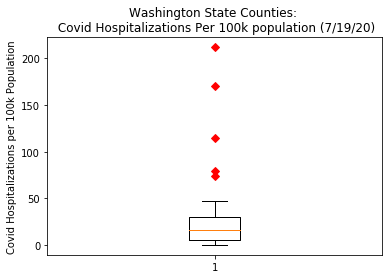

In [24]:
covid_boxha = covid_all2['Hoptializations_per100k']
covid_boxhd = covid_dem['Hoptializations_per100k']
covid_boxhr = covid_rep['Hoptializations_per100k']



cov_quartiles = covid_boxha.quantile([.25,.5,.75])
cov_lowerq = cov_quartiles[0.25]
cov_upperq = cov_quartiles[0.75]
cov_iqr = cov_upperq-cov_lowerq

print(f"The lower quartile of Cases per 100k pop is: {cov_lowerq}")
print(f"The upper quartile of Cases per 100k pop is: {cov_upperq}")
print(f"The interquartile range of Cases per 100k pop is: {cov_iqr}")
print(f"The the median of Cases per 100k pop is: {cov_quartiles[0.5]} ")

cov_lower_bound = cov_lowerq - (1.5*cov_iqr)
cov_upper_bound = cov_upperq + (1.5*cov_iqr)
print(f"Values below {cov_lower_bound} could be outliers.")
print(f"Values above {cov_upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Washington State Counties: \n Covid Hospitalizations Per 100k population (7/19/20)')
ax1.set_ylabel('Covid Hospitalizations per 100k Population')

ax1.boxplot(covid_boxha, 0, 'rD')

In [25]:
covid_boxha.sort_values(ascending=False).head(6)

35    212.059488
9     170.128752
2     114.976271
14     78.880247
27     73.715184
10     47.067009
Name: Hoptializations_per100k, dtype: float64

The lower quartile of Cases per 100k pop is: 5.057970405780399
The upper quartile of Cases per 100k pop is: 29.64848585128749
The interquartile range of Cases per 100k pop is: 24.59051544550709
The the median of Cases per 100k pop is: 16.10764865501134 
Values below -31.827802762480236 could be outliers.
Values above 66.53425901954813 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x2078be6db08>,
 'caps': [<matplotlib.lines.Line2D at 0x2078be6dc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2078be6d2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2078be71f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2078be71cc8>],
 'means': []}

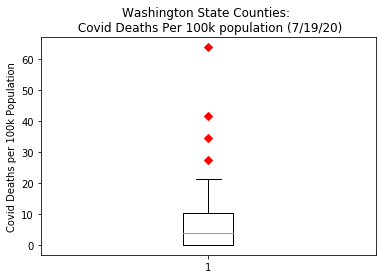

In [26]:
covid_boxda = covid_all2['Deaths_per100k']
covid_boxdd = covid_dem['Deaths_per100k']
covid_boxdr = covid_rep['Deaths_per100k']



cov_quartiles = covid_boxha.quantile([.25,.5,.75])
cov_lowerq = cov_quartiles[0.25]
cov_upperq = cov_quartiles[0.75]
cov_iqr = cov_upperq-cov_lowerq

print(f"The lower quartile of Cases per 100k pop is: {cov_lowerq}")
print(f"The upper quartile of Cases per 100k pop is: {cov_upperq}")
print(f"The interquartile range of Cases per 100k pop is: {cov_iqr}")
print(f"The the median of Cases per 100k pop is: {cov_quartiles[0.5]} ")

cov_lower_bound = cov_lowerq - (1.5*cov_iqr)
cov_upper_bound = cov_upperq + (1.5*cov_iqr)
print(f"Values below {cov_lower_bound} could be outliers.")
print(f"Values above {cov_upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Washington State Counties: \n Covid Deaths Per 100k population (7/19/20)')
ax1.set_ylabel('Covid Deaths per 100k Population')

ax1.boxplot(covid_boxda, 0, 'rD')

In [27]:
covid_boxda.sort_values(ascending=False).head(6)

35    63.777290
2     41.587162
9     34.655857
14    27.521527
27    21.287388
33    17.884640
Name: Deaths_per100k, dtype: float64

In [28]:
covid_rep = covid_all2[covid_all2.Political_Party == "Republican"]
covid_dem = covid_all2[covid_all2.Political_Party == "Democratic"]
covid_rep.head()

,Unnamed: 0,Unnamed: 0.1,County,NewPos_All,Age 0-19_cases,Age 20-39_cases,Age 40-59_cases,Age 60-79_cases,Age 80+_cases,Positive UnkAge_cases,...,Political_Party,Percent Below Poverty Level,Household Income Median,Household Income Mean,Population,Pop_per100k,Case_per100k,Deaths_per100k,Hoptializations_per100k,Population_Density
0,0,0,Adams County,166.0,17.0,63.0,59.0,25.0,0.0,2.0,...,Republican,25.2,49142.0,61370.0,19983.0,0.19983,830.706100,0.000000,45.038283,9.8
1,1,1,Asotin County,21.0,1.0,1.0,10.0,7.0,2.0,0.0,...,Republican,13.0,50423.0,65079.0,22582.0,0.22582,92.994420,8.856611,4.428306,34.3
2,2,2,Benton County,1956.0,185.0,747.0,572.0,285.0,166.0,1.0,...,Republican,12.8,65650.0,83941.0,204390.0,2.04390,956.993982,41.587162,114.976271,103.4
3,3,3,Chelan County,403.0,47.0,175.0,127.0,42.0,12.0,0.0,...,Republican,11.6,56135.0,75117.0,77200.0,0.77200,522.020725,7.772021,23.316062,24.6
6,6,6,Columbia County,8.0,4.0,1.0,2.0,1.0,0.0,0.0,...,Republican,11.6,51111.0,70516.0,3985.0,0.03985,200.752823,0.000000,0.000000,4.6


In [29]:
covid_all = covid_all2.drop(covid_all2.index[[0,2,9,35]])
covid_rep = covid_repol[covid_all.Political_Party == "Republican"]
covid_rep.head()

NameError: name 'covid_repol' is not defined

R value =  0.47
R squared =  0.22
p value = 0.004193187071419949 , significant at the alpha of .05


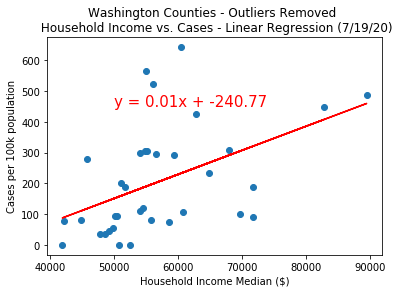

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Household Income Median"], covid_all["Case_per100k"])
regress_values = covid_all["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Household Income Median"], covid_all["Case_per100k"])
plt.plot(covid_all["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(50000,450),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Counties - Outliers Removed \n Household Income vs. Cases - Linear Regression (7/19/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs_no_outliers/rega_i_c.png")